Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

Load dataset

In [ ]:
df = pd.read_csv('/content/tech_layoffs.csv')
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


As is shown, the dataset includes the layoff numbers across industries, status of companies and so on.  

Preprocess data


Handle missing values

In [ ]:
df.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

This dataset includes 467 missing additional notes

In [ ]:
df['additional_notes'].head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Per Axios, 22 of the employees laid off were f...
Name: additional_notes, dtype: object

These notes are not critical for the data analysis and we can ignore this data.

In [ ]:
df = df.drop(columns=['additional_notes'])
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private


In [ ]:
df.shape

(489, 8)

Since the layoffs happen in different time, it's a good idea to specify the months and years.

In [ ]:
df['TransDate'] = pd.to_datetime(df['reported_date'])
df['year'] = df['TransDate'].dt.year
df['month'] = df['TransDate'].dt.month
df.drop(columns=['TransDate'], inplace=True)

In [ ]:
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,year,month
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022,12
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,2022,9
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,2022,8
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023,1
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,2022,5


Now based on the year and the month, we can sum the total layoffs.

In [ ]:
df['year'].value_counts()

2022    408
2023     81
Name: year, dtype: int64

As is shown, in 2022 there are 408 reported layoff events and in 2023 there are 81.

In [ ]:
df_2022 = df[df['year']==2022].groupby('month',as_index=False)[['company']].count().sort_values(by='company',ascending=False).reset_index(drop=True)
df_2022.rename(columns = {'company':'layoff'}, inplace = True)
df_2022

,month,layoff
0,11,75
1,6,57
2,7,55
3,8,52
4,12,49
5,10,40
6,9,33
7,5,29
8,4,10
9,3,5


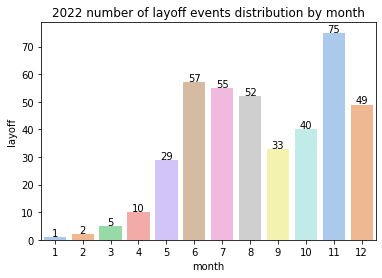

In [ ]:
# set the color palette of different colors
colors = sns.color_palette(sns.color_palette("pastel"), len(df_2022['month'].tolist()))
rank = df_2022.layoff.rank().sub(1).astype(int).array

ax = sns.barplot(data=df_2022, x="month", y="layoff",palette=np.array(colors[::-1])[rank])

for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 4),
                   textcoords = 'offset points')
plt.title('2022 number of layoff events distribution by month')
plt.show()

The plot demonstrates that last November, there're 75 layoffs, which was the largest number in 2022.

In [ ]:
df_company = df[(~df['total_layoffs'].str.contains('Unclear'))] # filter the records with "Unclear"
df_company['total_layoffs']=df_company['total_layoffs'].apply(lambda x: 0 if not x.isnumeric() else int(x))

df_company = df_company.groupby('company',as_index=False)[['total_layoffs']].sum().sort_values(by='total_layoffs',ascending=False).reset_index(drop=True)

Select the top 10 companies that have the highest layoff numbers.

In [ ]:
company_plot_df = df_company.head(10)
company_plot_df

,company,total_layoffs
0,Amazon,18000
1,Alphabet,12000
2,Meta,11000
3,Microsoft,10000
4,Salesforce,9090
5,Better.com,5000
6,Cisco,4100
7,Peloton,4084
8,Carvana,4000
9,Twitter,3740


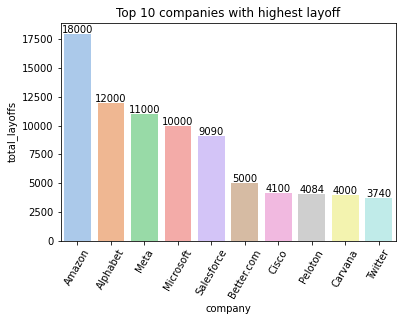

In [ ]:
colors = sns.color_palette(sns.color_palette("pastel"), len(company_plot_df['company'].tolist()))
rank = company_plot_df.total_layoffs.rank().sub(1).astype(int).array

ax = sns.barplot(data=company_plot_df, x="company", y="total_layoffs",palette=np.array(colors[::-1])[rank])

for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 4),
                   textcoords = 'offset points')
plt.xticks(rotation=60)
num_to_show = len(company_plot_df['company'].tolist())
plt.title(f'Top {num_to_show} companies with highest layoff')
plt.show()

The figure shows that Amazon, Alphabet, Meta, Microsoft, and Salesforce are the top 5 companies that have the largest scale layoff.

In [ ]:
df['industry'].value_counts()

Fintech                       24
Health Care                   17
PropTech                      15
E-commerce                    13
Cybersecurity                 10
                              ..
Enterprise Communication       1
AI                             1
Transporation, Logistics       1
Business development           1
enterprise tech, analytics     1
Name: industry, Length: 289, dtype: int64

Next, we can analyze the company industry distribution of the layoff events. As one company may belong to various industry tags, here we pick the first tag for each company as the corresponding industry.

In [ ]:
# update the industry
df['industry'] = df['industry'].str.split(',').str[0].tolist() # pick the first industry tag
df['industry'] = df['industry'].str.split(' ').str[-1].tolist() # pick the last word of the tag
df['industry'] = df['industry'].map(lambda x: x.lower() if isinstance(x,str) else x)

select the top 10 industries with most layoff events

In [ ]:
df_industry = pd.DataFrame({'industry':df['industry'].value_counts()[:10].keys().tolist(),
                            'counts':df['industry'].value_counts()[:10].values.tolist()})

In [ ]:
df_industry

,industry,counts
0,fintech,48
1,care,34
2,proptech,30
3,e-commerce,26
4,tech,18
5,media,18
6,software,17
7,edtech,14
8,cybersecurity,13
9,cryptocurrency,13


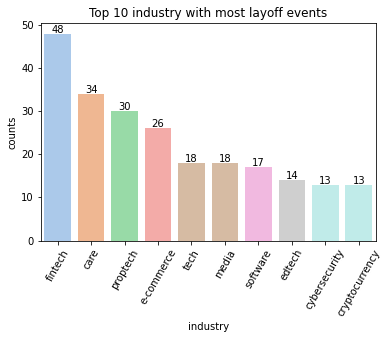

In [ ]:
colors = sns.color_palette(sns.color_palette("pastel"), len(df_industry['industry'].tolist()))
rank = df_industry.counts.rank().sub(1).astype(int).array

ax = sns.barplot(data=df_industry, x="industry", y="counts",palette=np.array(colors[::-1])[rank])

for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 4),
                   textcoords = 'offset points')
plt.xticks(rotation=60)
num_to_show = len(df_industry['industry'].tolist())
plt.title(f'Top {num_to_show} industry with most layoff events')
plt.show()

Then we try to visualize the total layoff numbers across industries.

In [ ]:
df_ind_layoff = df[(~df['total_layoffs'].str.contains('Unclear'))] # filter the records with "Unclear"
df_ind_layoff['total_layoffs']=df_ind_layoff['total_layoffs'].apply(lambda x: 0 if not x.isnumeric() else int(x))

df_ind_layoff = df_ind_layoff.groupby('industry',as_index=False)[['total_layoffs']].sum().sort_values(by='total_layoffs',ascending=False).reset_index(drop=True)

In [ ]:
df_ind_layoff_plot = df_ind_layoff.head(10)
df_ind_layoff_plot

,industry,total_layoffs
0,e-commerce,23232
1,tech,21670
2,media,16807
3,software,15903
4,fintech,11282
5,fitness,4486
6,care,4406
7,automotive,4054
8,proptech,3741
9,crypto,2340


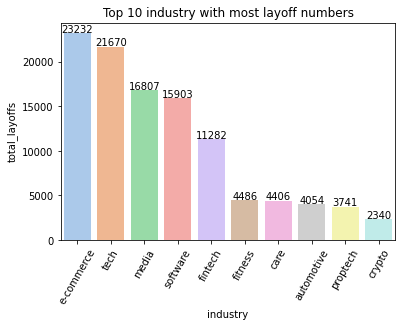

In [ ]:
colors = sns.color_palette(sns.color_palette("pastel"), len(df_ind_layoff_plot['industry'].tolist()))
rank = df_ind_layoff_plot.total_layoffs.rank().sub(1).astype(int).array

ax = sns.barplot(data=df_ind_layoff_plot, x="industry", y="total_layoffs",palette=np.array(colors[::-1])[rank])

for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 4),
                   textcoords = 'offset points')
plt.xticks(rotation=60)
num_to_show = len(df_ind_layoff_plot['industry'].tolist())
plt.title(f'Top {num_to_show} industry with most layoff numbers')
plt.show()

Next, we can explore the headquarter_locations for the layoffs.

In [ ]:
df['headquarter_location'].value_counts()

San Francisco          136
New York                77
Seattle                 21
Los Angeles             20
Boston                  16
                      ... 
Newark, DE               1
Truckee, CA              1
Hoboken, New Jersey      1
Dover, DE                1
San Francsico            1
Name: headquarter_location, Length: 134, dtype: int64

In [ ]:
df_hq_plot = pd.DataFrame({'location':df['headquarter_location'].value_counts()[:10].keys().tolist(),
                            'counts':df['headquarter_location'].value_counts()[:10].values.tolist()})

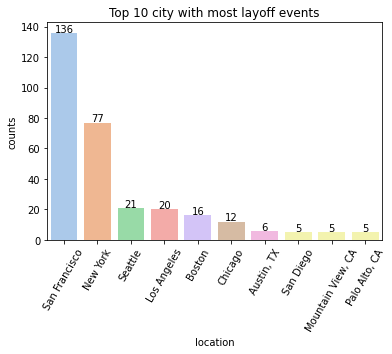

In [ ]:
colors = sns.color_palette(sns.color_palette("pastel"), len(df_hq_plot['location'].tolist()))
rank = df_hq_plot.counts.rank().sub(1).astype(int).array

ax = sns.barplot(data=df_hq_plot, x="location", y="counts",palette=np.array(colors[::-1])[rank])

for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 4),
                   textcoords = 'offset points')
plt.xticks(rotation=60)
num_to_show = len(df_hq_plot['location'].tolist())
plt.title(f'Top {num_to_show} headquarter locations with most layoff events')
plt.show()

Next, we can try to visualize the companies and the time as well as the layoff scale together.

In [ ]:
df_ind_layoff_time = df[(~df['total_layoffs'].str.contains('Unclear'))] # filter the records with "Unclear"
df_ind_layoff_time['total_layoffs']=df_ind_layoff_time['total_layoffs'].apply(lambda x: 0 if not x.isnumeric() else int(x))
df_ind_layoff_time.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,year,month
0,C2FO,20,2,12/9/2022,fintech,"Leawood, KS",Kansas City Business Journal,Private,2022,12
2,Amperity,13,3,8/20/2022,saas,Seattle,Geekwire,Private,2022,8
3,Addepar,20,3,1/18/2023,fintech,"Mountain View, CA",Fortune,Private,2023,1
4,Thirty Madison,24,3,5/13/2022,care,New York,Axios,Private,2022,5
6,Armis Security,25,4,12/8/2022,cybersecurity,San Francisco,Calcalistech,Private,2022,12


In [ ]:
df_ind_layoff_time = df_ind_layoff_time.groupby(['year','month','industry'],as_index=False)[['total_layoffs']].sum().sort_values(by='total_layoffs',ascending=False).reset_index(drop=True)
df_ind_layoff_time

,year,month,industry,total_layoffs
0,2023,1,tech,21090
1,2023,1,e-commerce,18000
2,2022,11,media,11200
3,2023,1,software,10000
4,2022,4,fintech,5600
...,...,...,...,...
195,2022,4,e-commerce,19
196,2022,6,benefits,16
197,2022,8,saas,13
198,2022,6,crypto,12


In [ ]:
df_ind_layoff_2022 = df_ind_layoff_time[df_ind_layoff_time['year']==2022]
df_ind_layoff_2022.head()

,year,month,industry,total_layoffs
2,2022,11,media,11200
4,2022,4,fintech,5600
5,2022,11,software,4508
6,2022,10,fitness,4084
9,2022,10,e-commerce,2300


In [ ]:
fig_2022=px.treemap(df_ind_layoff_2022,path=['month','industry','total_layoffs'],template='simple_white',hover_name='month',hover_data=['month','industry','total_layoffs'],title='Layoff across industry in 2022')
# fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig_2022.update_layout(title_x=.5)
fig_2022.show()

In [ ]:
df_ind_layoff_2023 = df_ind_layoff_time[df_ind_layoff_time['year']==2023]
df_ind_layoff_2023.head()

,year,month,industry,total_layoffs
0,2023,1,tech,21090
1,2023,1,e-commerce,18000
3,2023,1,software,10000
7,2023,1,automotive,4000
8,2023,1,media,3969


In [ ]:
fig_2023=px.treemap(df_ind_layoff_2023,path=['month','industry','total_layoffs'],template='simple_white',hover_name='month',hover_data=['month','industry','total_layoffs'],title='Layoff across industry in 2023')
# fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig_2023.update_layout(title_x=.5)
fig_2023.show()

In [ ]:
df_company_loc = df[(~df['total_layoffs'].str.contains('Unclear'))] # filter the records with "Unclear"
df_company_loc['total_layoffs']=df_company_loc['total_layoffs'].apply(lambda x: 0 if not x.isnumeric() else int(x))
df_company_loc.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,year,month
0,C2FO,20,2,12/9/2022,fintech,"Leawood, KS",Kansas City Business Journal,Private,2022,12
2,Amperity,13,3,8/20/2022,saas,Seattle,Geekwire,Private,2022,8
3,Addepar,20,3,1/18/2023,fintech,"Mountain View, CA",Fortune,Private,2023,1
4,Thirty Madison,24,3,5/13/2022,care,New York,Axios,Private,2022,5
6,Armis Security,25,4,12/8/2022,cybersecurity,San Francisco,Calcalistech,Private,2022,12


In [ ]:
df_company_loc['headquarter_location'] = df_company_loc['headquarter_location'].str.split(',').str[0].tolist()

In [ ]:
df_company_loc = df_company_loc.groupby(['headquarter_location','company'],as_index=False)[['total_layoffs']].sum().sort_values(by='total_layoffs',ascending=False).reset_index(drop=True)
df_company_loc.head()

,headquarter_location,company,total_layoffs
0,Seattle,Amazon,18000
1,Mountain View,Alphabet,12000
2,Menlo Park,Meta,11000
3,Seattle,Microsoft,10000
4,San Francisco,Salesforce,9090


In [ ]:
df_company_loc_plot = df_company_loc.head(20)

In [ ]:
fig_company_loc=px.treemap(df_company_loc_plot,path=['headquarter_location','company','total_layoffs'],template='simple_white',hover_name='headquarter_location',hover_data=['headquarter_location','company','total_layoffs'],title='Layoff of companies in different headquarter location')
# fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig_company_loc.update_layout(title_x=.5)
fig_company_loc.show()